In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("weather_forecast_data.csv")

In [3]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
df['Rain'] = le.fit_transform(df['Rain'])

In [7]:
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

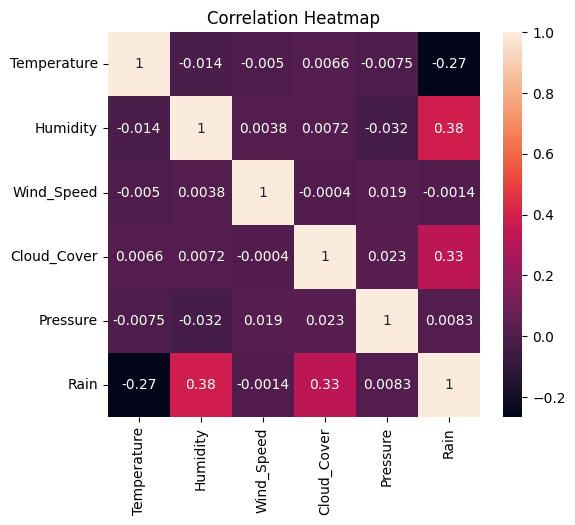

In [11]:
plt.figure(figsize=(6,5))
plt.title("Correlation Heatmap")
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
df.duplicated().sum()

0

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('Rain',axis=1)
y = df['Rain']
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
y_pred = model.predict(x_test)
print("Accuracy:",accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

Accuracy: 0.942
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       450
           1       0.68      0.78      0.73        50

    accuracy                           0.94       500
   macro avg       0.83      0.87      0.85       500
weighted avg       0.95      0.94      0.94       500



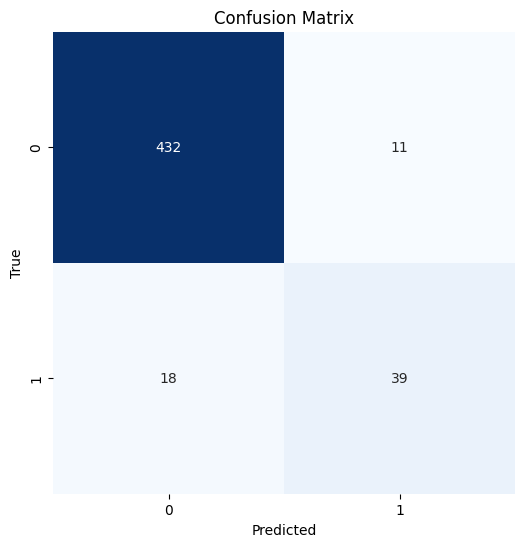

In [20]:
conf_m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

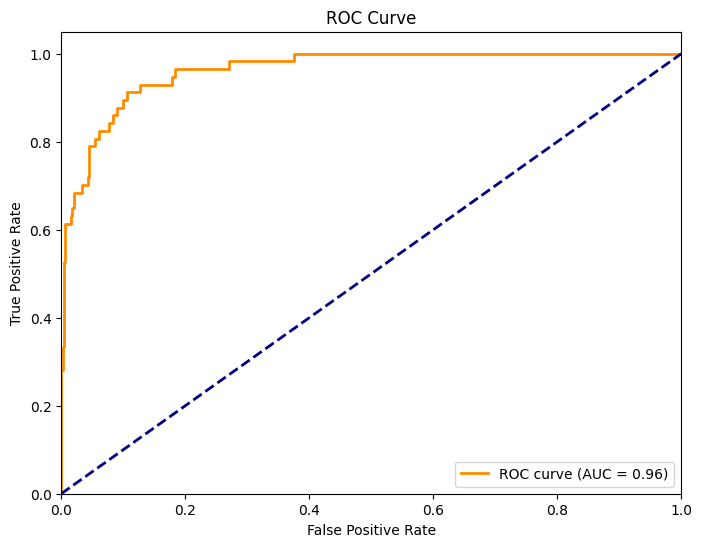

In [23]:
y_pred_proba = model.predict_proba(x_test)[:,1]

fpr,tpr,_ = roc_curve(y_test,y_pred_proba)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color = 'darkorange', lw = 2, label =f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],color = 'navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [34]:
model.intercept_

array([-8.77083863])